
# Lab Two: Exploring Image Data

### Dataset: 
Group: Benjamin Kuo & Nick Benso

Potential datasets:
- https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
- https://www.kaggle.com/datasets/rhammell/ships-in-satellite-imagery

Business Understanding:



In [3]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import os
import cv2
import sklearn
from imutils import paths
from sklearn.utils import shuffle
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


dir_path  = r"C:\Users\nicho\Downloads\Garbage classification"

classes = os.listdir(dir_path)
print(classes)

target_size = (224, 224)
waste_labels = {"cardboard":0, "glass":1, "metal":2, "paper":3, "plastic":4, "trash":5}
    
def load_dataset(path):
  x = []
  labels = []
  image_paths = sorted(list(paths.list_images(path)))
  for image_path in image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    x.append(img)
    label = image_path.split(os.path.sep)[-2]
    labels.append(waste_labels[label])
  x, labels = shuffle(x, labels, random_state=42)
  input_shape = (np.array(x[0]).shape[1], np.array(x[0]).shape[1], 3)
  print("X shape: ", np.array(x).shape)
  print(f"Number of Labels: {len(np.unique(labels))} , Number of Observation: {len(labels)}")
  print("Input Shape: ", input_shape)
  x = np.asarray(x)
  return x, labels, input_shape

x, labels, input_shape = load_dataset(dir_path)
h, w, _ = input_shape

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
X shape:  (2527, 224, 224, 3)
Number of Labels: 6 , Number of Observation: 2527
Input Shape:  (224, 224, 3)


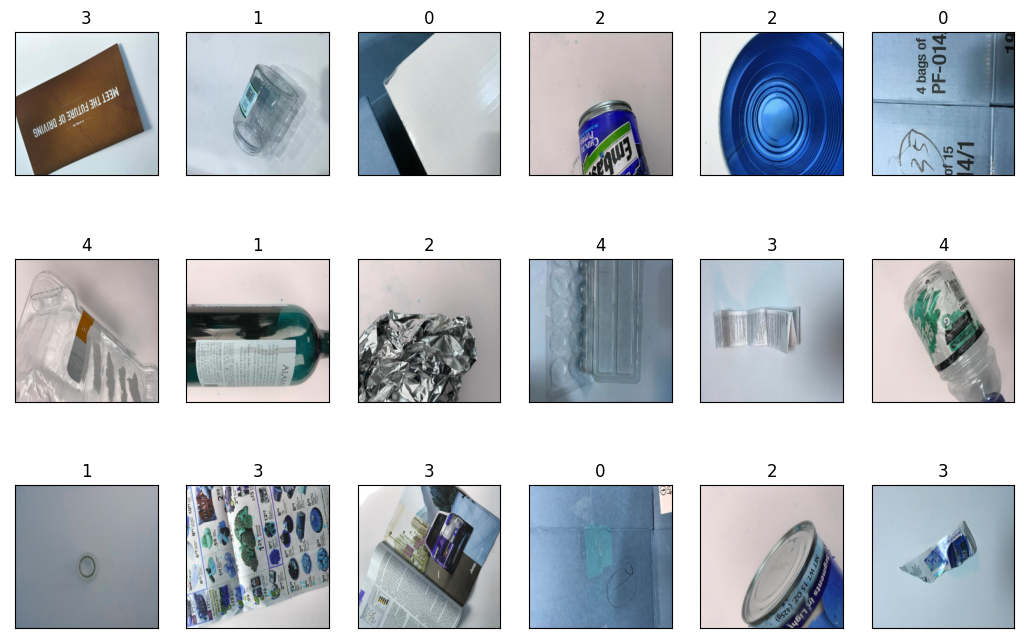

In [4]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(x, labels, h, w) # defaults to showing a 3 by 6 subset of the faces

In [5]:
from sklearn.decomposition import PCA

n_components = 300
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, x.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(x.copy())
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 300 eigenfaces from 2527 faces


ValueError: Found array with dim 4. Estimator expected <= 2.

AttributeError: 'PCA' object has no attribute 'components_'